# Medical Cost Personal Insurance Project

In [71]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Now loading the dataset
df = pd.read_csv('Medical_Cost_Personal_Insurance_Project.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# checking the shape of the dataset
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

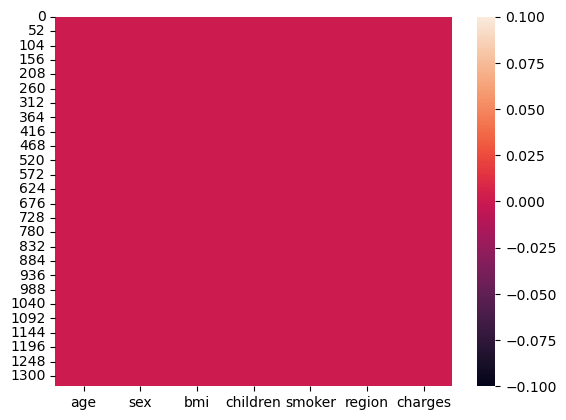

In [8]:
# Checking by plot heatmap
sns.heatmap(df.isnull())

In [9]:
# Let's check the unique values for confirmation of the null values
for i in df.columns:
    print(df[i].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


In [10]:
# checking the stats by using describe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# checking the skewness of the numeric data
df['age'].skew()

0.05567251565299186

In [12]:
df['bmi'].skew()

0.2840471105987448

In [13]:
df['children'].skew()

0.9383804401702414

<Axes: ylabel='Frequency'>

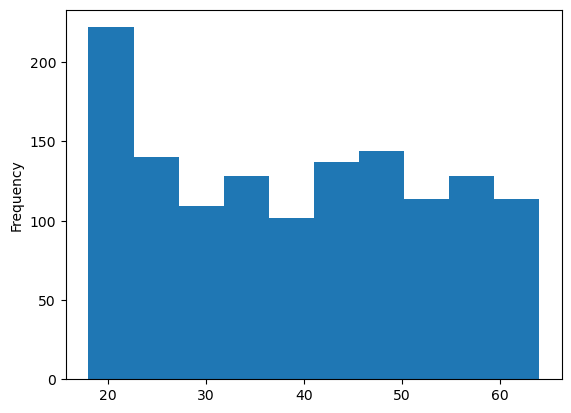

In [14]:
# checking the distribut by plot histogram 
df['age'].plot.hist()

<Axes: ylabel='Frequency'>

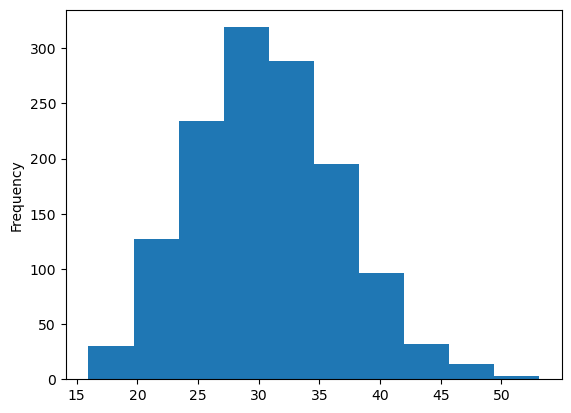

In [15]:
df['bmi'].plot.hist()

<Axes: ylabel='Frequency'>

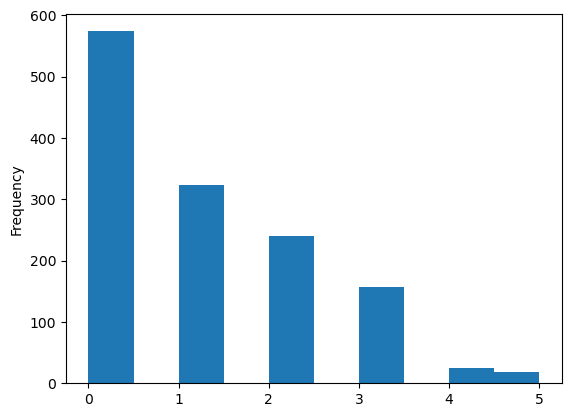

In [16]:
df['children'].plot.hist()

<Axes: >

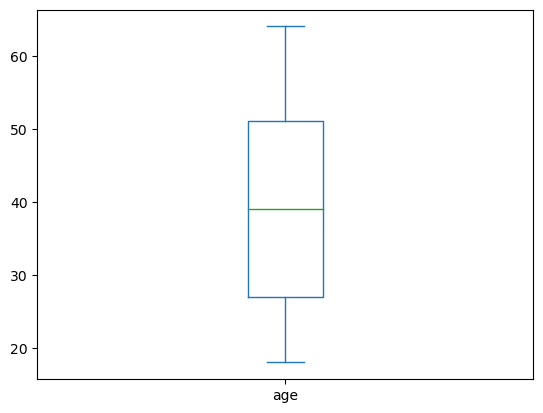

In [17]:
# checking the outliers of the numeric cols by ploting the box plot
df['age'].plot.box()

<Axes: >

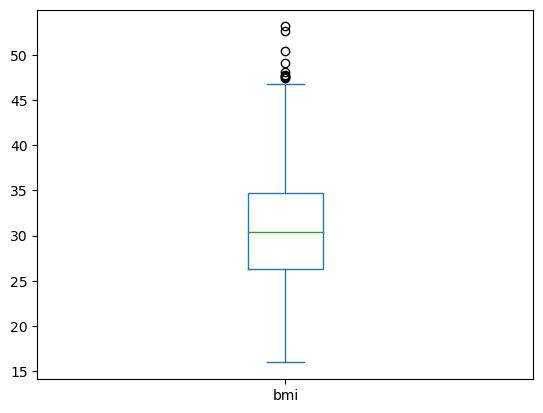

In [18]:
df['bmi'].plot.box()

<Axes: >

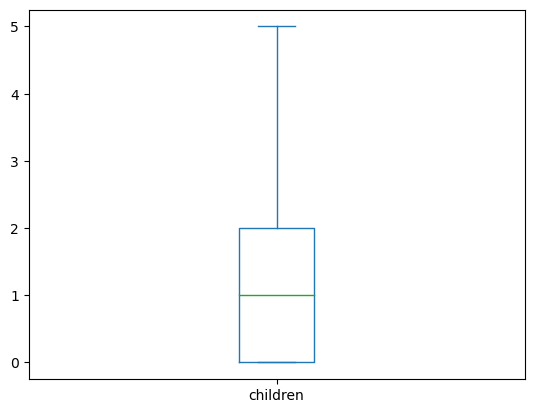

In [19]:
df['children'].plot.box()

### Removing the outliers from the bmi col using the cube root method

In [20]:
# removing the outliers of bmi col using the cbrt method
df['bmi'] = np.cbrt(df['bmi'])

In [21]:
# checking the skewness again of these two cols
df['bmi'].skew()

-0.07576471384129303

<Axes: >

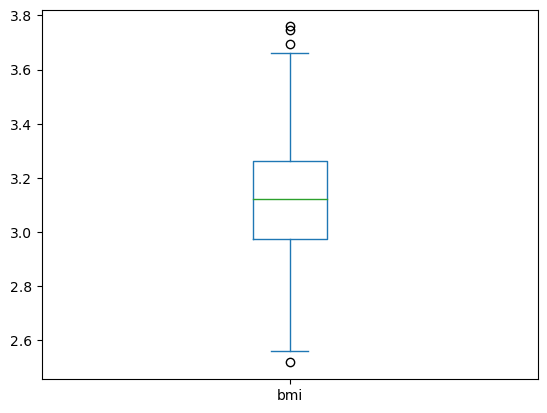

In [22]:
# Lets check the outliers by ploting the box plot
df['bmi'].plot.box()

In [23]:
# finding the 25th and 75th percentile of the bmi col
bmi_percentile25 = df['bmi'].quantile(.25)
bmi_percentile75 = df['bmi'].quantile(.75)
print(bmi_percentile25)
print(bmi_percentile75)

2.973705333704264
3.261497701985518


In [24]:
# Now finding the IQR of bmi col
bmi_iqr = bmi_percentile75 - bmi_percentile25
bmi_iqr

0.287792368281254

In [25]:
# Now finding the upper and the lower limit of the bmi col
bmi_upper = bmi_percentile75 + 1.5 * bmi_iqr
bmi_lower = bmi_percentile25 - 1.5 * bmi_iqr
print(bmi_upper)
print(bmi_lower)

3.693186254407399
2.542016781282383


##### Capping

In [26]:
# capping the outliers 
df['bmi'] = np.where(
    df['bmi'] > bmi_upper, bmi_upper,
    np.where(
        df['bmi'] < bmi_lower, bmi_lower,
        df['bmi']
    )
)

In [27]:
df.shape

(1338, 7)

<Axes: >

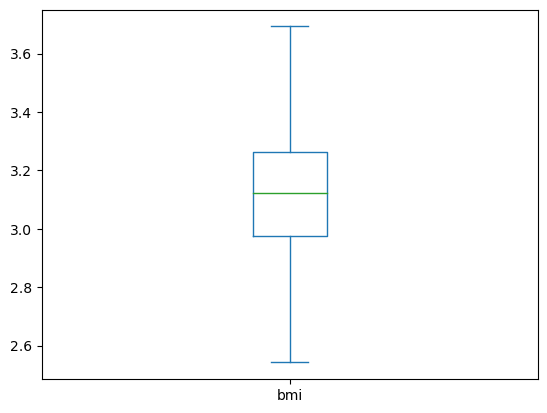

In [28]:
# rechecking the outliers present or not in the bmi col
df['bmi'].plot.box()

<Axes: ylabel='Frequency'>

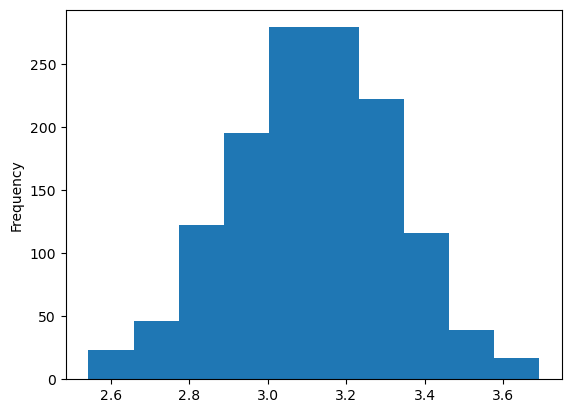

In [29]:
df['bmi'].plot.hist()

In [30]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,3.032970,0,yes,southwest,16884.9240
1,18,male,3.232290,1,no,southeast,1725.5523
2,28,male,3.207534,3,no,southeast,4449.4620


### Visualizing the categorical data

sex
male      676
female    662
Name: count, dtype: int64


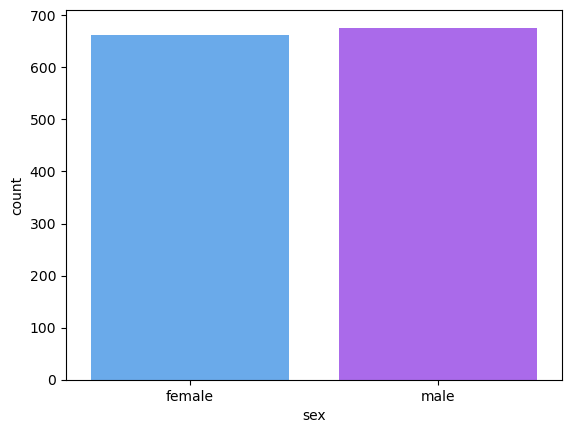

In [31]:
# visualizing the sex col by using the count plot
ax = sns.countplot(x = 'sex', data = df, palette = 'cool')
print(df['sex'].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


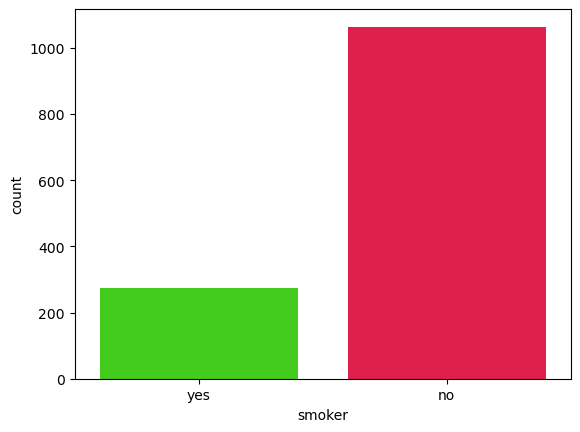

In [32]:
# visualizing the smoker col using the count plot
ax1 = sns.countplot(x = 'smoker', data = df, palette = 'prism')
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


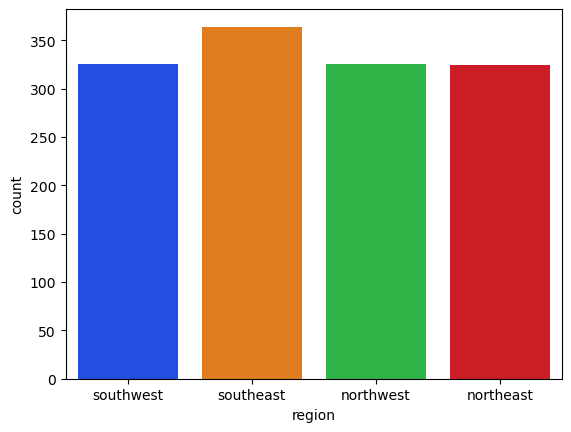

In [33]:
# Visualizing the region col by using the count plot
ax2 = sns.countplot(x = 'region', data = df, palette = 'bright')
print(df['region'].value_counts())

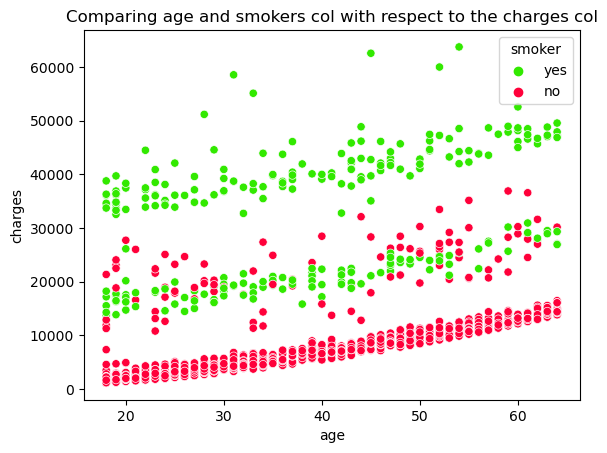

In [34]:
# Comparing age and smokers col with respect to the charges col
plt.title('Comparing age and smokers col with respect to the charges col')
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'prism')
plt.show()

In [35]:
# converting the smoker col ie 'yes' or 'no' into binary value ie 1 for 'yes' and 0 for 'no'
df['smoker_binary'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['smoker_binary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: smoker_binary
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [36]:
# dropping the smoker col since we have converted it into binary
df.drop('smoker', axis = 1, inplace = True)

In [37]:
df.head(2)

,age,sex,bmi,children,region,charges,smoker_binary
0,19,female,3.03297,0,southwest,16884.9240,1
1,18,male,3.23229,1,southeast,1725.5523,0


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


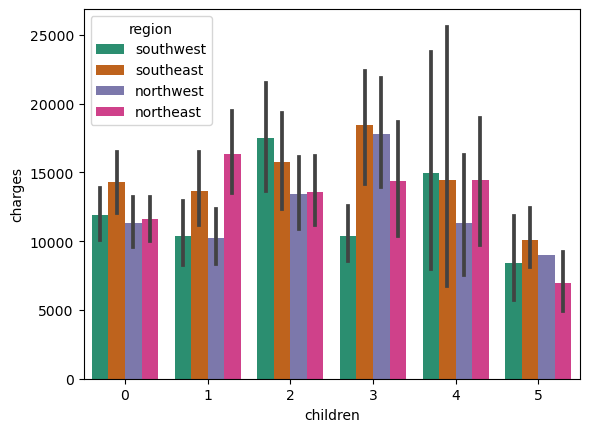

In [38]:
# plotting the barplot for comparing age and smoker_binary col
sns.barplot(x='children', y ='charges', hue = 'region', data=df, palette = 'Dark2')
print(df['region'].value_counts())

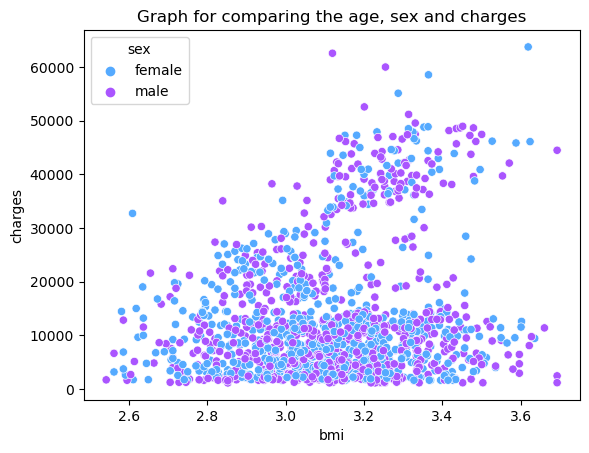

In [39]:
# Plotting the scatter plot for comparing the age, sex and charges
plt.title('Graph for comparing the age, sex and charges')
sns.scatterplot(x = 'bmi', y = 'charges', data = df, hue = 'sex', palette = 'cool')
plt.show()

C:\Users\andyt\AppData\Local\Temp\ipykernel_17824\2444105876.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'bmi', y = 'age', data = df, palette = 'bright')


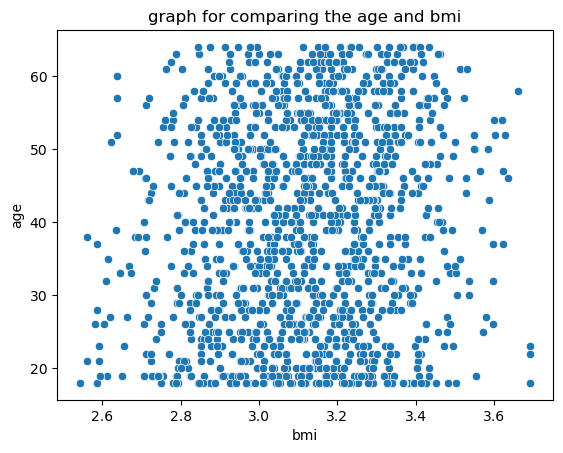

In [40]:
# plotting scatter plot for comparing the age and bmi
plt.title('graph for comparing the age and bmi')
sns.scatterplot(x = 'bmi', y = 'age', data = df, palette = 'bright')
plt.show()

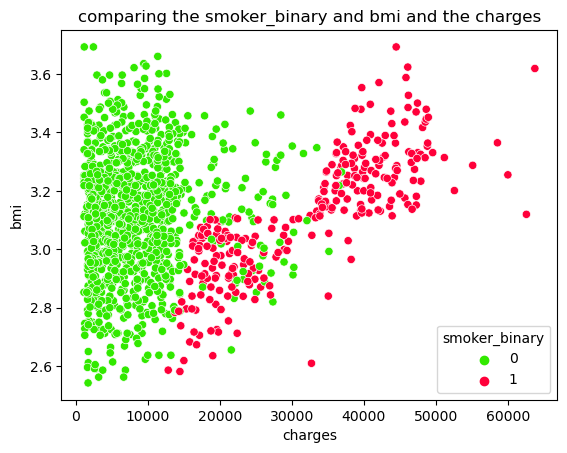

In [41]:
#plotting graph for comparing the smoker_binary and bmi and the charges
plt.title('comparing the smoker_binary and bmi and the charges')
sns.scatterplot(x = 'charges', y = 'bmi', data = df, hue = 'smoker_binary', palette = 'prism')
plt.show()

<Axes: xlabel='region', ylabel='charges'>

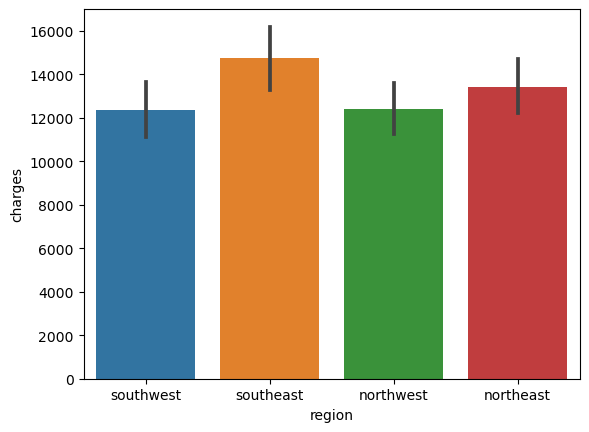

In [42]:
# plotting bar graph for comparing region and the charges 
sns.barplot(x = 'region', y = 'charges', data =df)

In [43]:
df.head(2)

,age,sex,bmi,children,region,charges,smoker_binary
0,19,female,3.03297,0,southwest,16884.9240,1
1,18,male,3.23229,1,southeast,1725.5523,0


In [44]:
# dropping the unwanted cols ie sex and region which doesn't impact the target col
df.drop('sex', axis = 1, inplace = True)
df.drop('region', axis = 1, inplace = True)

In [45]:
# changing the indexing of the target data for my convinience
charges = df.pop('charges')
df['charges'] = charges

In [46]:
df.head(2)

,age,bmi,children,smoker_binary,charges
0,19,3.03297,0,1,16884.9240
1,18,3.23229,1,0,1725.5523


## Creating the model 

In [47]:
# creating the x variable for storing the input data
x = df.iloc[:, 0:-1]
x.head(2)

,age,bmi,children,smoker_binary
0,19,3.03297,0,1
1,18,3.23229,1,0


In [48]:
x.shape

(1338, 4)

In [49]:
# Creating the y variable for storing the target data
y = df.iloc[:, -1:]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [50]:
y.shape

(1338, 1)

In [51]:
# Splitting the data for training and testing part
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = .3, random_state = 45)

In [52]:
# checking the shape of x_train
x_train.shape

(936, 4)

In [53]:
# checking the shape of y_train
y_train.shape

(936, 1)

In [54]:
# checking the shape of x_test
x_test.shape

(402, 4)

In [55]:
# checking the shape of y_test
y_test.shape

(402, 1)

In [56]:
# Creating instance lr and the Linear Regression
lr = LinearRegression()
lr

LinearRegression()

In [57]:
# Applying fit method on x_train and y_train
lr.fit(x_train, y_train)

LinearRegression()

In [58]:
# Checking the Coefficient values these values are added or subtracted from the y variable as per their sign
lr.coef_

array([[  258.36085479,  9145.42874023,   431.56295269, 24498.91705528]])

In [59]:
# Checking the Intercept values 
lr.intercept_ 

array([-30567.63730027])

In [60]:
# checking the accuracy of our model
lr.score(x_train, y_train)

0.7620381012456772

In [61]:
# predicting the cost
pred = lr.predict(x_test)
print('Predicted result cost: ', pred)
print('Actual cost: ', y_test)

Predicted result cost:  [[ 3420.88446864]
 [10020.22119379]
 [39564.60934867]
 [ 4406.76799484]
 [ 9081.38385178]
 [13741.19455167]
 [ 4067.99454806]
 [15072.89101723]
 [10459.91298925]
 [35077.10652013]
 [ 5520.60711495]
 [11959.83987627]
 [ 8384.14763653]
 [ 9125.36811378]
 [11059.1342559 ]
 [ 7480.532072  ]
 [ 1279.05456859]
 [ 7102.77380516]
 [ 7923.09007275]
 [12250.3891313 ]
 [ 8836.41446881]
 [33642.44891807]
 [15364.72958518]
 [31735.6031596 ]
 [12603.76393058]
 [17096.06848108]
 [30782.10562626]
 [10110.42596505]
 [ 4069.3364269 ]
 [13628.91309927]
 [ 8555.21482196]
 [12909.6654526 ]
 [ 7112.26278987]
 [ 3363.91261083]
 [11278.34723085]
 [ 5871.01010105]
 [ 5291.30047571]
 [12275.29397316]
 [37995.87486055]
 [10395.76239605]
 [36048.34588731]
 [  536.10133794]
 [ 8283.29054156]
 [ 9052.27980117]
 [ 4826.98565734]
 [ 8410.91103666]
 [ 9086.97179348]
 [12900.25549451]
 [13366.00704055]
 [11731.78794974]
 [ 4466.9051361 ]
 [38890.69081535]
 [10243.63509515]
 [18622.31656813]
 [15

In [62]:
# checking the errors by metrics MSE, MAE and RMSE
print('error')
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

error
Mean Squared Error:  35616410.007218055
Mean Absolute Error:  4261.057047455196
Root Mean Squared Error:  5967.948559364269


In [63]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.709397921438987


In [64]:
# predicting the cost of medical insurance
t = np.array([21, 2.864880, 0, 0])

In [65]:
t = t.reshape(1, -1)
t.shape

(1, 4)

In [66]:
lr.predict(t)

C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1058.49653954]])